In [74]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0


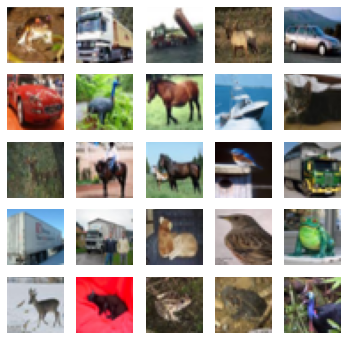

In [76]:
plt.figure(figsize=(6,6))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.show()

In [77]:
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


# Padding same

In [111]:
cnn = tf.keras.models.load_model('/content/cifar10_accuracy_81v1.h5')
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [125]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
cnn.add(Conv2D(31,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 31)        8959      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 31)       0         
 g2D)                                                            
                                                                 
 dropout_66 (Dropout)        (None, 16, 16, 31)        0         
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 64)        17920     
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [126]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [127]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/50
391/391 [==============================] - 14s 33ms/step - loss: 1.8088 - accuracy: 0.3272 - val_loss: 1.4035 - val_accuracy: 0.4824
Epoch 2/50
391/391 [==============================] - 13s 32ms/step - loss: 1.3605 - accuracy: 0.5095 - val_loss: 1.1745 - val_accuracy: 0.5806
Epoch 3/50
391/391 [==============================] - 12s 32ms/step - loss: 1.1656 - accuracy: 0.5844 - val_loss: 1.0091 - val_accuracy: 0.6451
Epoch 4/50
391/391 [==============================] - 13s 33ms/step - loss: 1.0546 - accuracy: 0.6267 - val_loss: 0.9216 - val_accuracy: 0.6719
Epoch 5/50
391/391 [==============================] - 13s 32ms/step - loss: 0.9739 - accuracy: 0.6604 - val_loss: 0.9335 - val_accuracy: 0.6633
Epoch 6/50
391/391 [==============================] - 12s 32ms/step - loss: 0.8989 - accuracy: 0.6848 - val_loss: 0.8029 - val_accuracy: 0.7198
Epoch 7/50
391/391 [==============================] - 13s 32ms/step - loss: 0.8583 - accuracy: 0.7020 - val_loss: 0.7470 - val_accuracy:

In [128]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5712 - accuracy: 0.8219


[0.5711957812309265, 0.8219000101089478]

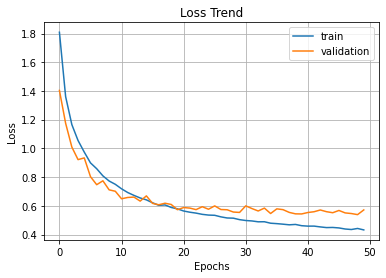

In [131]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

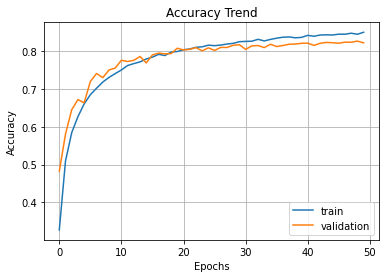

In [132]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

In [133]:
cnn.save ('./cifar10_accuracy_82v1.h5')